# Homework 4: Data Visualization
- **Name**:  Shadman Chowdhury
- **UB Username**: skchowdh
- **UB Person Number**: 50316242

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

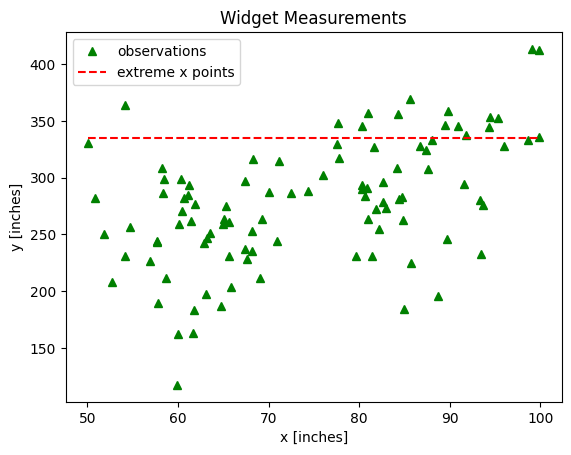

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# read in data with numpy
data = np.genfromtxt('scatter_data.csv', delimiter=',', comments='%')

# plot data
plt.plot(data[:,0], data[:,1], 'g^', label='observations')
plt.plot([np.min(data[:,0]), np.max(data[:,0])], [335,335], "r--", label='extreme x points')
plt.title('Widget Measurements')
plt.xlabel('x [inches]')
plt.ylabel('y [inches]')
plt.legend()
plt.show()


### Problem 2 - Histogram

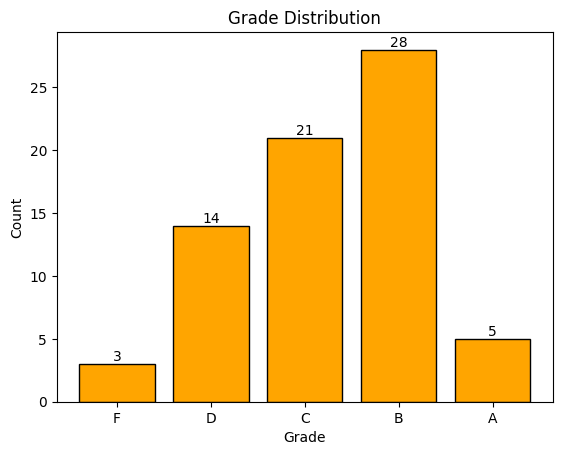

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Read in data with numpy and ignore rows starting with '%'
data = np.genfromtxt('student_grades.csv', delimiter=',', comments='%')

grade = {"F": 0, "D": 0, "C": 0, "B": 0, "A": 0}

# A [90, 100]
# B [80, 90)
# C [70, 80)
# D [60, 70)
# F < 60
# Compute the grade distribution
for score in data[:, 1]:
    if score < 60:
        grade["F"] += 1
    elif score < 70:
        grade["D"] += 1
    elif score < 80:
        grade["C"] += 1
    elif score < 90:
        grade["B"] += 1
    elif score <= 100:
        grade["A"] += 1

counts = list(grade.values())

plt.bar(grade.keys(), counts, color='orange', edgecolor='black')

# Write the counts above the bars
for x, y in zip(grade.keys(), counts):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Label the axes
plt.xlabel('Grade')
plt.ylabel('Count')

# Set the title for the histogram
plt.title('Grade Distribution')

# Show the plot
plt.show()

### Problem 3 - Barplot and Boxplot in the Same Figure

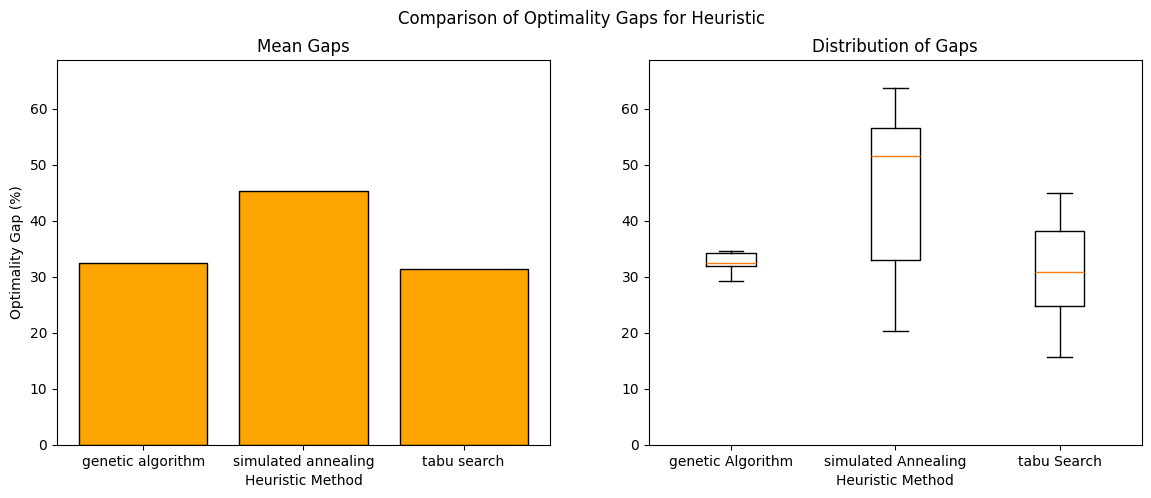

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Read in data with numpy and ignore rows starting with '%' the second column is a string
data = np.genfromtxt('solution_data.csv', delimiter=',', comments='%', dtype='str')

# Create a dictionary to store the OFV for each solution approach
ofv = {"optimal": [], "genetic algorithm": [], "simulated annealing": [], "tabu search": []}

# Iterate through each row of the data
for row in data:
    # Get the solution approach
    approach = row[1]
    # Get the OFV
    value = float(row[2])
    # Append the OFV to the list for the corresponding solution approach
    ofv[approach].append(value)

# Calculate the average optimality gap for each heuristic
boxMap = {"genetic algorithm": 0, "simulated annealing": 0, "tabu search": 0}
for key in ofv.keys():
    if key == "optimal":
        continue
    boxMap[key] = ((np.array(ofv["optimal"]) - np.array(ofv[key])) / np.array(ofv["optimal"]) * 100)

# Create the figure and subplots with proper layout
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Left barplot
axs[0].bar(boxMap.keys(), [np.mean(boxMap["genetic algorithm"]), np.mean(boxMap["simulated annealing"]), np.mean(boxMap["tabu search"])], color='orange', edgecolor='black')
axs[0].set_xlabel('Heuristic Method')
axs[0].set_ylabel('Optimality Gap (%)')
axs[0].set_title('Mean Gaps')

# Right boxplot
box_data = [boxMap["genetic algorithm"], boxMap["simulated annealing"], boxMap["tabu search"]]
axs[1].boxplot(box_data, labels=['genetic Algorithm', 'simulated Annealing', 'tabu Search'])
axs[1].set_xlabel('Heuristic Method')
axs[1].set_title('Distribution of Gaps')

# Find the maximum y-value across both subplots to set the y-axis limit
max_y_value = max(max([np.mean(boxMap["genetic algorithm"]), np.mean(boxMap["simulated annealing"]), np.mean(boxMap["tabu search"])]), 
                 max([max(boxMap["genetic algorithm"]), max(boxMap["simulated annealing"]), max(boxMap["tabu search"])]))

# Set the same y-axis limit for both subplots
axs[0].set_ylim(0, max_y_value + 5)
axs[1].set_ylim(0, max_y_value + 5)

#Set the title for the figure
fig.suptitle("Comparison of Optimality Gaps for Heuristic")

# Show the plot
plt.show()

--- 
## Part 2 - Explore New Plot Types

[In this space, provide a concise explanation of your plot.  The reader should be able to read this to learn what kind of plot you're about to create, what type of data you're going to plot, and why you believe it is wise to use this type of plot for this type of data.  (replace these instructions with your actual content, and remove the brackets)]

- **URL of Example Code**:  [include a link to the matplotlib or Seaborn example.  remove the brackets]
- **URL of Sample Data**:  [include a link to the sample data you're using.  remove the brackets]

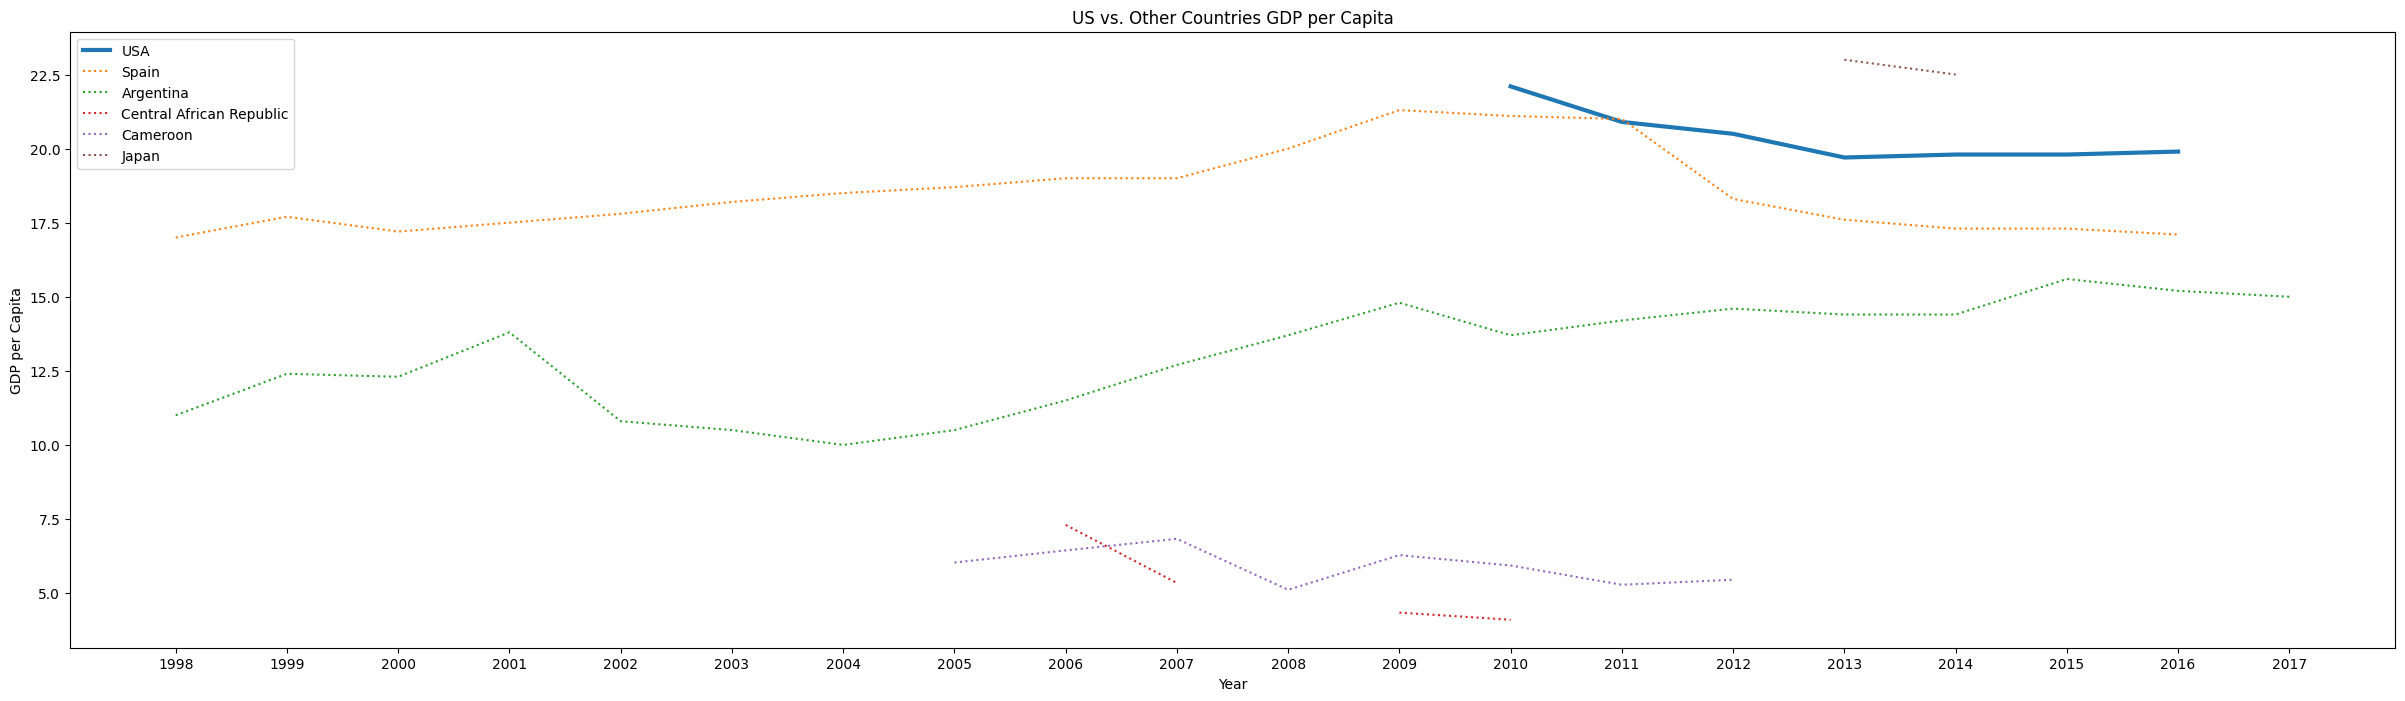

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# open the file using pandas
data = pd.read_csv('exp.csv')

usa_row = data[data['country'] == 'USA']

other_random_rows = data[data['country'] != 'USA'].sample(5)

# Make it a line graph for USA
plt.plot(usa_row.columns[1:], usa_row.values[0][1:], '-', label='USA', linewidth=3)

# Make it a scatter plot for the other countries
for i in range(len(other_random_rows)):
    plt.plot(other_random_rows.columns[1:], other_random_rows.values[i][1:], ':', label=other_random_rows.values[i][0])

#increase the size of the plot
plt.rcParams['figure.figsize'] = [25, 8]

# Set the title
plt.title('US vs. Other Countries GDP per Capita')

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('GDP per Capita')

# Set the legend
plt.legend()

# Show the plot
plt.show()


In [2]:
# The data is from: https://www.gapminder.org/data/
# You have to type the the field to get the data, type "Expenditure on primary education (% of govenment expenditure)"" to get the data
# The plot type docs: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html

# The data represents Government expenditure on education as % of GDP (%)
# The dashed blue line represents the USA
# The solid lines represent 5 randomly selected countries, at every time you run the code, you will get different 5 countries

# Explanation of the code:
# 1. Open the csv file using pandas
# 2. Select the row for USA
# 3. Select 5 random rows for other countries
# 4. Plot the data
# 5. Set the title and labels for the plot

# customizing the plot:
# To change the color of the lines, you can use the color parameter in the plot function
# To change the line style, you can use the linestyle parameter in the plot function (e.g. linestyle='--')
# To change the line width, you can use the linewidth parameter in the plot function (e.g. linewidth=3)
# To change the size of the plot, you can use the rcParams function (e.g. plt.rcParams['figure.figsize'] = [20, 8])
# To change the legend, you can use the legend function (e.g. plt.legend())
# To change the title, you can use the title function (e.g. plt.title('US vs. Other Countries'))
# To change the x-axis label, you can use the xlabel function (e.g. plt.xlabel('Year'))
# To change the y-axis label, you can use the ylabel function (e.g. plt.ylabel('GDP per Capita'))
# To change the x-axis limit, you can use the xlim function (e.g. plt.xlim(1950, 2010))
# To change the y-axis limit, you can use the ylim function (e.g. plt.ylim(0, 10))
# To change the x-axis ticks, you can use the xticks function (e.g. plt.xticks([1950, 1970, 1990, 2010]))

[Now, finish up your plot with a Markdown explanation of the key elements of the above code.  It is particularly useful to provide examples of how someone else might want to customize your plot.  For example, perhaps they might want to change colors, font sizes, scales, etc.] 